In [1]:

import utils
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from torch.utils.tensorboard import SummaryWriter

from data_loader import prepare_cifar_dataloader,\
    CIFAR_CLASS_LABELS
from utils import plot_misclassified_images
from explainer import grad_cam
from metrics import get_metrics
import model


/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
device='mps:0'
epochs=20
batch_size=512
n_misclassif=20
n_grad_cam=20
writer=SummaryWriter('GradCam')

/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           1,728
       BatchNorm2d-2           [-1, 64, 28, 28]             128
            Conv2d-3           [-1, 64, 28, 28]          36,864
       BatchNorm2d-4           [-1, 64, 28, 28]             128
            Conv2d-5           [-1, 64, 28, 28]          36,864
       BatchNorm2d-6           [-1, 64, 28, 28]             128
        BasicBlock-7           [-1, 64, 28, 28]               0
            Conv2d-8           [-1, 64, 28, 28]          36,864
       BatchNorm2d-9           [-1, 64, 28, 28]             128
           Conv2d-10           [-1, 64, 28, 28]          36,864
      BatchNorm2d-11           [-1, 64, 28, 28]             128
       BasicBlock-12           [-1, 64, 28, 28]               0
           Conv2d-13       

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.48E+00


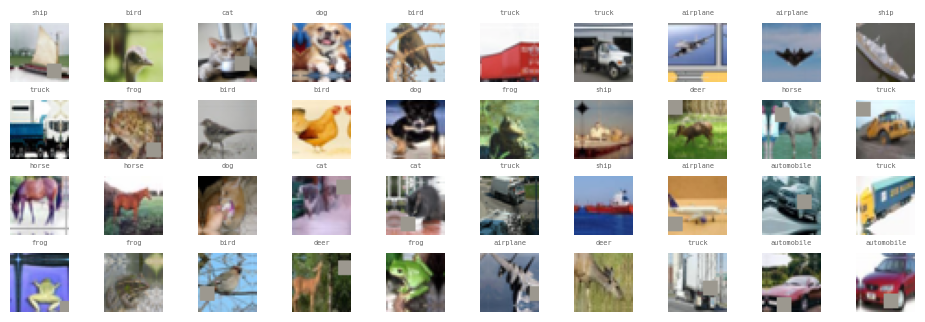

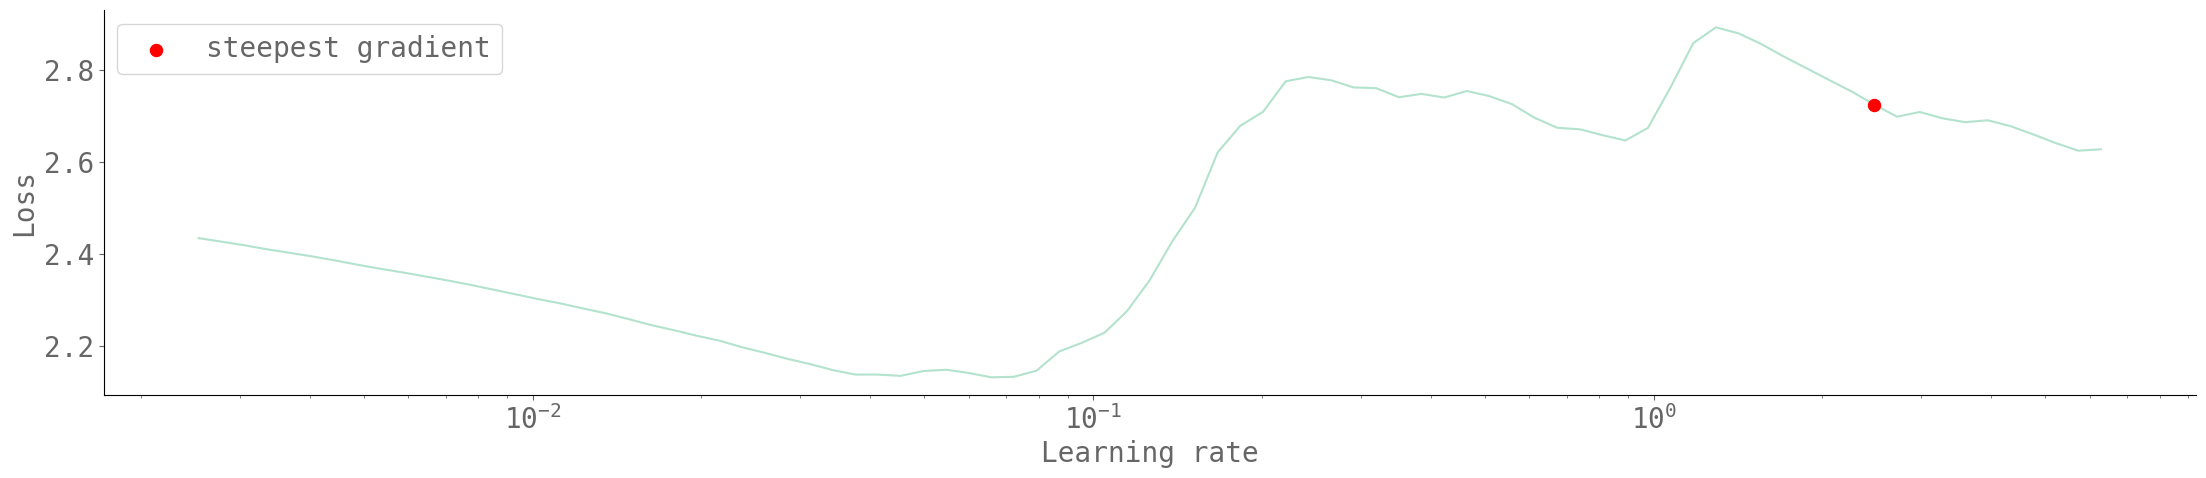

EPOCH: 0


Loss=1.8482 Batch_id=97 LR=0.51623 Accuracy=25.85: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.56it/s]


Test set: Average loss: 0.0036, Accuracy: 3326/10000 (33.26%)

EPOCH: 1


Loss=1.4735 Batch_id=97 LR=1.00770 Accuracy=39.58: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.66it/s]


Test set: Average loss: 0.0033, Accuracy: 4185/10000 (41.85%)

EPOCH: 2


Loss=1.2902 Batch_id=97 LR=1.49916 Accuracy=49.03: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
100%|██████████| 20/20 [00:03<00:00,  5.35it/s]


Test set: Average loss: 0.0029, Accuracy: 4972/10000 (49.72%)

EPOCH: 3


Loss=1.0373 Batch_id=97 LR=1.99063 Accuracy=57.50: 100%|██████████| 98/98 [01:14<00:00,  1.31it/s]
100%|██████████| 20/20 [00:03<00:00,  5.06it/s]


Test set: Average loss: 0.0024, Accuracy: 5726/10000 (57.26%)

EPOCH: 4


Loss=0.9366 Batch_id=97 LR=2.47539 Accuracy=63.16: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
100%|██████████| 20/20 [00:03<00:00,  5.67it/s]


Test set: Average loss: 0.0021, Accuracy: 6382/10000 (63.82%)

EPOCH: 5


Loss=0.8706 Batch_id=97 LR=2.31027 Accuracy=68.77: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.68it/s]


Test set: Average loss: 0.0019, Accuracy: 6668/10000 (66.68%)

EPOCH: 6


Loss=0.7444 Batch_id=97 LR=2.14515 Accuracy=73.05: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
100%|██████████| 20/20 [00:03<00:00,  5.44it/s]


Test set: Average loss: 0.0016, Accuracy: 7182/10000 (71.82%)

EPOCH: 7


Loss=0.7054 Batch_id=97 LR=1.98003 Accuracy=76.36: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
100%|██████████| 20/20 [00:03<00:00,  5.68it/s]


Test set: Average loss: 0.0014, Accuracy: 7566/10000 (75.66%)

EPOCH: 8


Loss=0.5923 Batch_id=97 LR=1.81490 Accuracy=79.40: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
100%|██████████| 20/20 [00:03<00:00,  5.67it/s]


Test set: Average loss: 0.0011, Accuracy: 8046/10000 (80.46%)

EPOCH: 9


Loss=0.5321 Batch_id=97 LR=1.64978 Accuracy=81.45: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.68it/s]


Test set: Average loss: 0.0012, Accuracy: 7963/10000 (79.63%)

EPOCH: 10


Loss=0.4470 Batch_id=97 LR=1.48466 Accuracy=83.63: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
100%|██████████| 20/20 [00:03<00:00,  5.68it/s]


Test set: Average loss: 0.0010, Accuracy: 8243/10000 (82.43%)

EPOCH: 11


Loss=0.4704 Batch_id=97 LR=1.31954 Accuracy=84.67: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
100%|██████████| 20/20 [00:03<00:00,  5.64it/s]


Test set: Average loss: 0.0009, Accuracy: 8457/10000 (84.57%)

EPOCH: 12


Loss=0.3532 Batch_id=97 LR=1.15442 Accuracy=86.23: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.69it/s]


Test set: Average loss: 0.0009, Accuracy: 8505/10000 (85.05%)

EPOCH: 13


Loss=0.3895 Batch_id=97 LR=0.98929 Accuracy=87.35: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.70it/s]


Test set: Average loss: 0.0009, Accuracy: 8511/10000 (85.11%)

EPOCH: 14


Loss=0.3417 Batch_id=97 LR=0.82417 Accuracy=88.54: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.70it/s]


Test set: Average loss: 0.0009, Accuracy: 8546/10000 (85.46%)

EPOCH: 15


Loss=0.2930 Batch_id=97 LR=0.65905 Accuracy=89.80: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.69it/s]


Test set: Average loss: 0.0008, Accuracy: 8737/10000 (87.37%)

EPOCH: 16


Loss=0.2134 Batch_id=97 LR=0.49393 Accuracy=90.82: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.61it/s]


Test set: Average loss: 0.0007, Accuracy: 8846/10000 (88.46%)

EPOCH: 17


Loss=0.2065 Batch_id=97 LR=0.32881 Accuracy=91.99: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.70it/s]


Test set: Average loss: 0.0007, Accuracy: 8864/10000 (88.64%)

EPOCH: 18


Loss=0.2023 Batch_id=97 LR=0.16368 Accuracy=93.04: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
100%|██████████| 20/20 [00:03<00:00,  5.55it/s]


Test set: Average loss: 0.0007, Accuracy: 8938/10000 (89.38%)

EPOCH: 19


Loss=0.1395 Batch_id=97 LR=-0.00144 Accuracy=94.36: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
100%|██████████| 20/20 [00:03<00:00,  5.42it/s]


Test set: Average loss: 0.0006, Accuracy: 9039/10000 (90.39%)

Accuracy for class: airplane is 92.3 %
Accuracy for class: automobile is 97.2 %
Accuracy for class: bird  is 86.2 %
Accuracy for class: cat   is 79.8 %
Accuracy for class: deer  is 90.6 %
Accuracy for class: dog   is 84.8 %
Accuracy for class: frog  is 93.7 %
Accuracy for class: horse is 91.9 %
Accuracy for class: ship  is 94.0 %
Accuracy for class: truck is 93.4 %


NameError: name 'np' is not defined

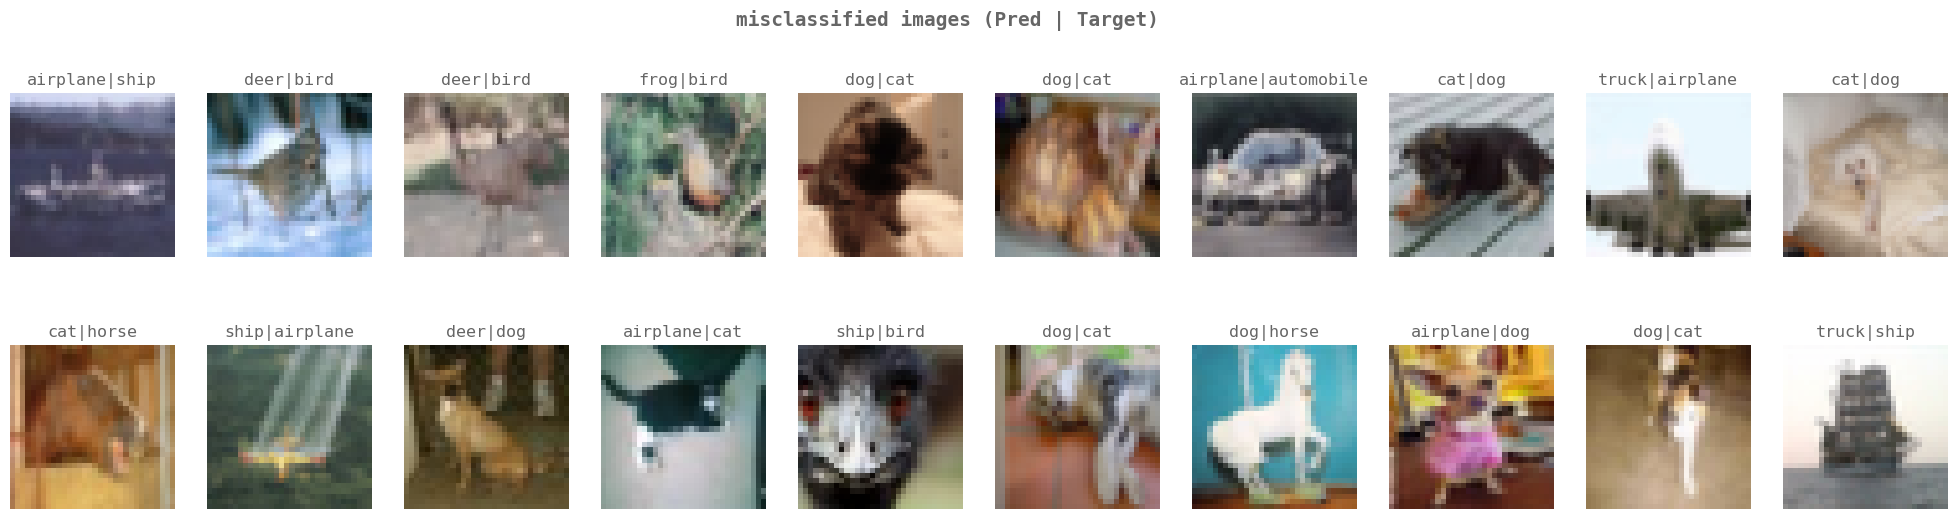

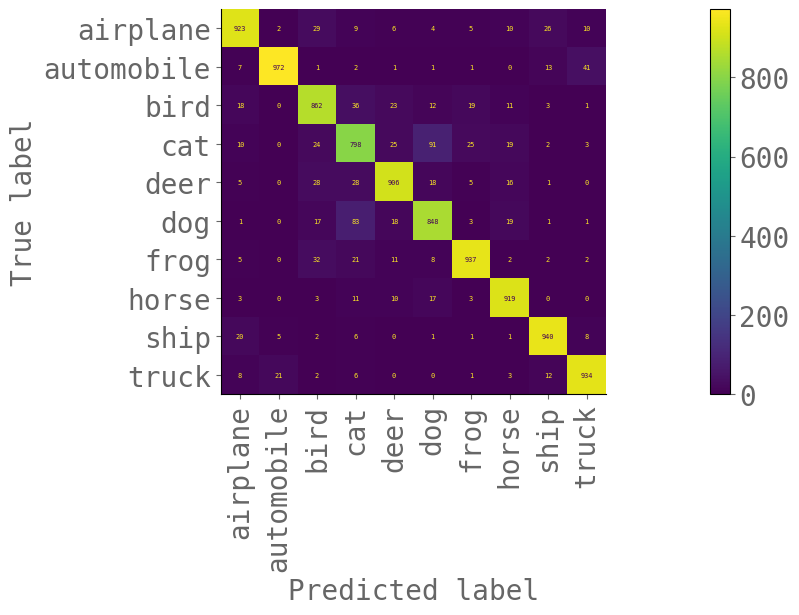

In [3]:
train_loader, test_loader = prepare_cifar_dataloader(
    batch_size=batch_size
)
utils.plot_img_batch(
    train_loader, CIFAR_CLASS_LABELS,
    ncols=10, nrows=4)

network = model.ResNet18()
print(model.summary_printer(network))
network.to(device)


optimizer = optim.SGD(network.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
suggested_lr = model.lr_finder(
    network, optimizer, criterion, device, train_loader,
    writer)

scheduler = OneCycleLR(
    optimizer, max_lr=suggested_lr,
    steps_per_epoch=len(train_loader),
    epochs=epochs, 
    pct_start=5/epochs, 
    three_phase=False,
    div_factor=100,
    final_div_factor=100,
    anneal_strategy='linear',
)

for epoch in range(epochs):
    print("EPOCH:", epoch)
    model.train(network, device, 
        train_loader, optimizer, scheduler, writer)
    test_acc = model.test(network, device, test_loader, writer)

model.plot_loss_n_acc(writer)

## plot_misclassified images
labels_df = model.get_pred_n_actuals(network, test_loader, device)
plot_misclassified_images(labels_df, test_loader.dataset, 
        CIFAR_CLASS_LABELS, n_samples=n_misclassif,
        nrows=2, ncols=10, figsize=(25,6),
        title='misclassified images (Pred | Target)', )

get_metrics(labels_df, CIFAR_CLASS_LABELS)




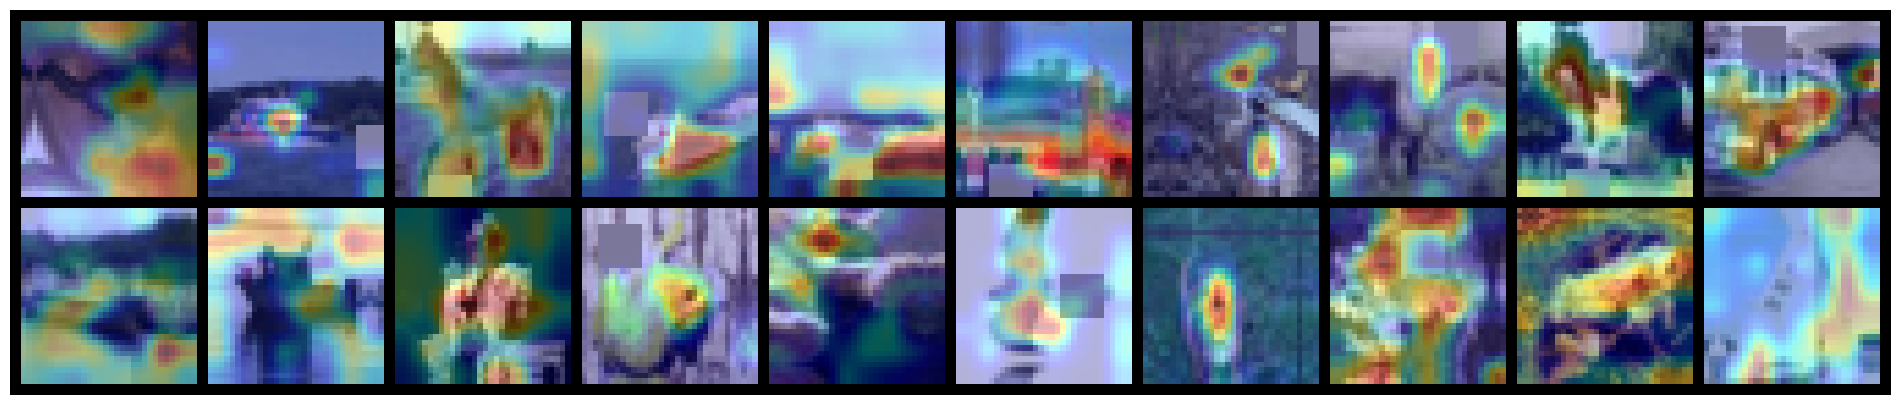

In [4]:
from importlib import reload
import explainer
reload(explainer)
## Grad cam visualization
target_layers = [network.layer3[-1]]
inputs, target = next(iter(train_loader))
input_tensor = inputs[:n_grad_cam].to(device)
true_class = target[:n_grad_cam].to(device)
cam_output = grad_cam(network, target_layers,
    input_tensor, None)